In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns

# Import API key
api_key = "a85d3d4e8611903d22f50c4e21dd61a2"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(api_key)

a85d3d4e8611903d22f50c4e21dd61a2


In [49]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [50]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [51]:
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=a85d3d4e8611903d22f50c4e21dd61a2&units=imperial&q=


In [52]:
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []
Cities = []




for city in cities:
   try:
       response = requests.get(query_url + city).json()
       Cloudiness.append(response['clouds']['all'])
       Country.append(response['sys']['country'])
       Date.append(response['dt'])
       Humidity.append(response['main']['humidity'])
       Lat.append(response['coord']['lat'])
       Lng.append(response['coord']['lon'])
       Max_Temp.append(response['main']['temp_max'])
       Wind_Speed.append(response['wind']['speed'])
       Cities.append(city)
   except:
       pass

In [53]:
city_dict = {
        "City": Cities,
        "Cloudiness": Cloudiness,
        "Country": Country,
        "Date": Date,
        "Humidity": Humidity,
        "Latitude": Lat,
        "Longitude": Lng,
        "Temperature": Max_Temp,
        "Speed": Wind_Speed}

city_data = pd.DataFrame(city_dict)
city_data

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Temperature,Speed
0,severo-kurilsk,48,RU,1538852397,92,50.68,156.12,46.19,17.36
1,nuuk,75,GL,1538851800,69,64.17,-51.74,35.60,3.36
2,kununurra,0,AU,1538850600,69,-15.77,128.74,75.20,2.59
3,codrington,80,AU,1538853449,99,-28.95,153.24,57.17,2.26
4,albany,90,US,1538852040,77,42.65,-73.75,64.04,13.87
5,new norfolk,75,AU,1538850600,93,-42.78,147.06,50.00,1.92
6,khatanga,88,RU,1538852636,97,71.98,102.47,37.37,3.60
7,dunedin,12,NZ,1538852613,80,-45.87,170.50,32.33,3.71
8,zlynka,0,RU,1538848800,71,52.43,31.74,53.60,11.18
9,harper,75,US,1538849700,63,30.30,-99.24,86.00,6.93


In [54]:
city_data.to_csv("weatherpy_data.csv", encoding="utf-8", index=False)

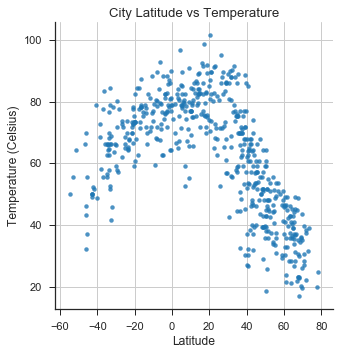

In [61]:

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Latitude',
          'Temperature',
          data=city_data,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
plt.title("City Latitude vs Temperature")
plt.show()

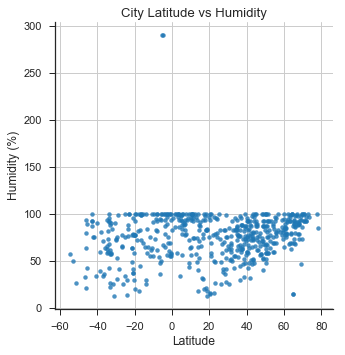

In [58]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Latitude',
          'Humidity',
          data=city_data,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.show()

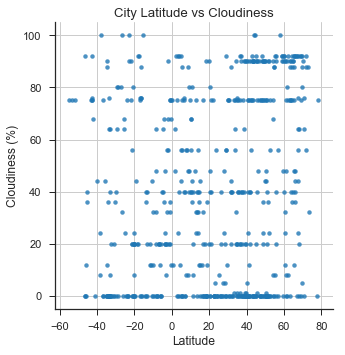

In [59]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Latitude',
          'Cloudiness',
          data=city_data,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.show()

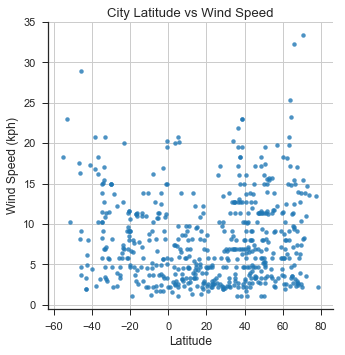

In [63]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Latitude',
          'Speed',
          data=city_data,
          fit_reg=False,
          scatter_kws={"marker": "o",
                        "s": 20})
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kph)")
plt.title("City Latitude vs Wind Speed")
plt.show()